The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

I am conducting an exploratory data analysis to get a sense of the data. As there is no data dictionary, I am assuming that "Surv_Status" = 1 means the patient survived, and "Surv_Status" = 2 means the patient did not survive.

The analysis is below.

In [87]:
import scipy.interpolate.interpnd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

h = pd.read_csv("haberman.csv", names=["Age", "Op_Year", "Axil_Nodes", "Surv_Status"])

h.head()

,Age,Op_Year,Axil_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Verified data is correct, and got a general view of the columns/data.

The number of rows and columns: (306, 4)


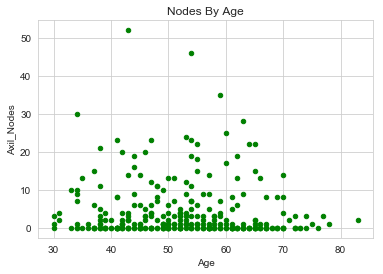

In [88]:
print("The number of rows and columns: " + str(h.shape))
h.plot(kind='scatter',x='Age',y='Axil_Nodes',color='g', title="Nodes By Age")
plt.show()

Observations:

1. There is no clear correlation between age and number of nodes.

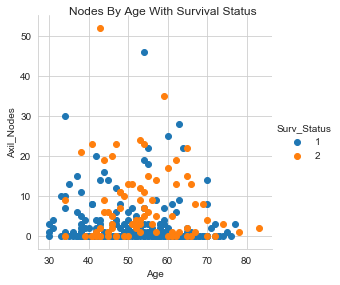

In [89]:
sns.set_style("whitegrid")
sns.FacetGrid(h, hue = 'Surv_Status', size = 4) \
    .map(plt.scatter, 'Age', 'Axil_Nodes').add_legend()
plt.gcf().suptitle("Nodes By Age With Survival Status")
plt.show()

Observations:

1. There is no clear relationship between age, axil nodes, and survival status visible in this graph.

Text(0.5,0.98,'Age, Operating Year, and Nodes Mapped To Determine Relationships')

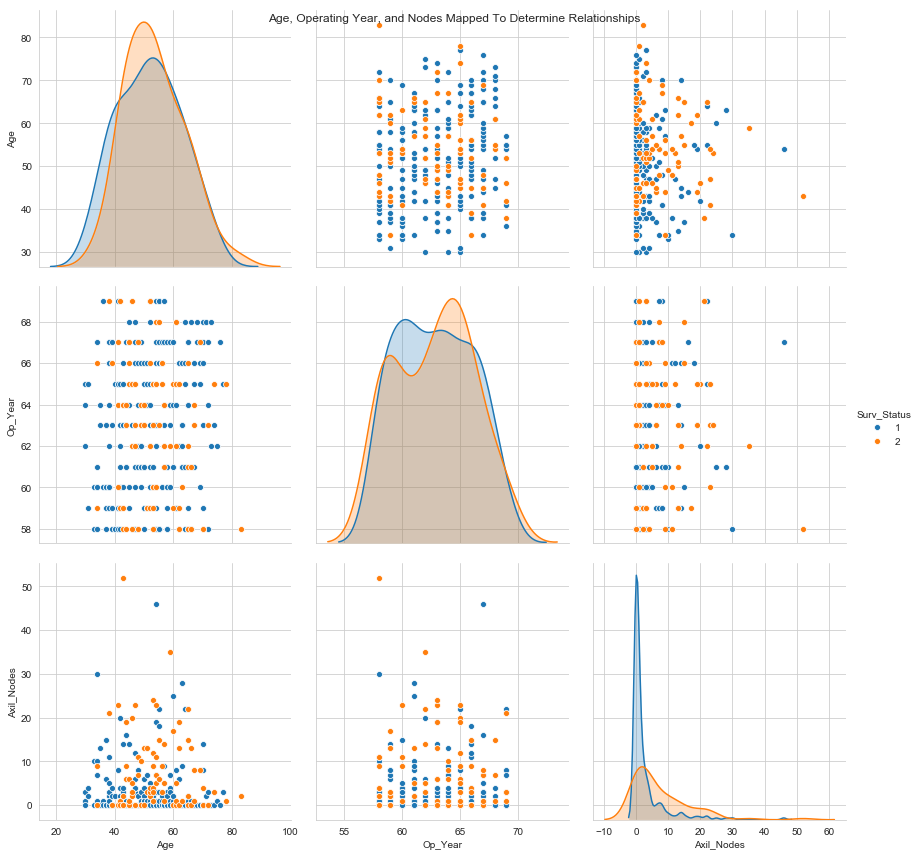

In [90]:
sns.pairplot(h, hue ='Surv_Status', size=4, vars=['Age','Op_Year','Axil_Nodes'])
plt.gcf().suptitle("Age, Operating Year, and Nodes Mapped To Determine Relationships")

Observations:
1. At the extremes, younger folks (under 40 years old) tend to have higher rates of survival following breast cancer surgery, while older folks (over 70 years old) tend to have lower rates of survival than average.

Text(0.5,0.98,'Age Vs. Survival Status')

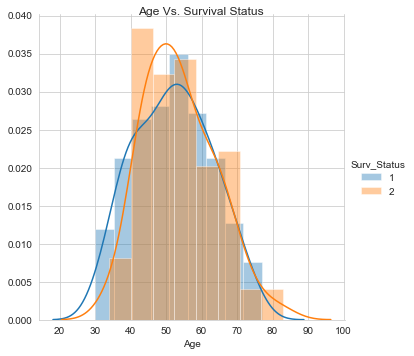

In [91]:
sns.FacetGrid(h, hue='Surv_Status', size = 5).map(sns.distplot,"Age").add_legend();
plt.gcf().suptitle("Age Vs. Survival Status")

Observations:
1. This shows again that folks under 40 are more likely to be surivivors, though not substantially. Folks over 80 are much less likely to survive using this dataset, though it only includes a few people in that age.
2. Age alone is not a good predictor of survival.

Text(0.5,0.98,'Nodes Vs. Survival Status')

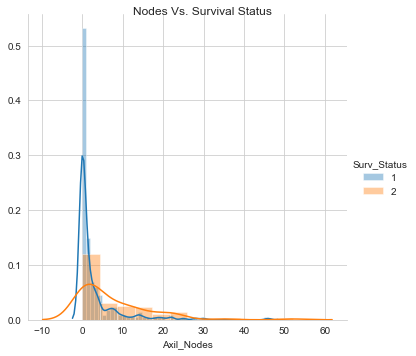

In [92]:
sns.FacetGrid(h, hue='Surv_Status', size = 5).map(sns.distplot,"Axil_Nodes").add_legend();
plt.gcf().suptitle("Nodes Vs. Survival Status")

Observations:
1. Survivors typically have 6 or fewer nodes. Non-survivors vary in the number of nodes, but a higher proportion have 7+ nodes.

Text(0.5,0.98,'Operating Year Vs. Survival Status')

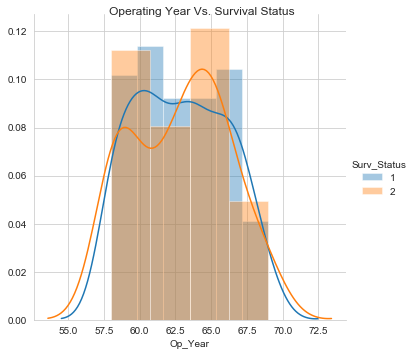

In [93]:
sns.FacetGrid(h, hue='Surv_Status', size = 5).map(sns.distplot,"Op_Year").add_legend();
plt.gcf().suptitle("Operating Year Vs. Survival Status")

Observations:
1. While operating year has little to do with survival rate, it does appear that there was a marked decrease in mortality from 1958 to 1961, then a marked increase until 1967. After that, the survival rate went back to normal.

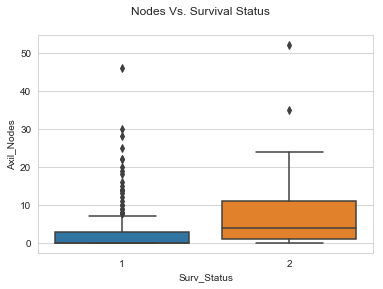

In [94]:
sns.boxplot(x='Surv_Status', y='Axil_Nodes', data=h)
plt.gcf().suptitle("Nodes Vs. Survival Status")
plt.show()

Observations:
1. Most patients who do not survive have 3+ nodes. While some survivors have 3+ nodes as well, it is a relatively small proportion of survivors.
2. Nodes are the best single indicator in the data of likelihood of survival.

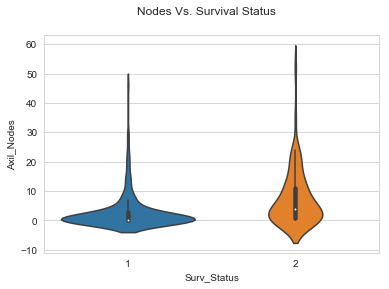

In [95]:
sns.violinplot(x='Surv_Status', y='Axil_Nodes', data=h)
plt.gcf().suptitle("Nodes Vs. Survival Status")
plt.show()

Observations:

1. There are more survivors with 3+ nodes than visible from the box and whiskers plot alone. However, they are still a small proportion of all patients with 3+ nodes.

In [96]:
#Creating two new tables, Survived_Yes (with survivors) and Survived_No (with non-survivors)
survived_yes = h.loc[h['Surv_Status'] == 1]
survived_no = h.loc[h['Surv_Status'] == 2]

[0.66666667 0.06666667 0.05777778 0.04444444 0.00888889 0.01777778
 0.04444444 0.00888889 0.00888889 0.00444444 0.00444444 0.00444444
 0.01333333 0.00888889 0.         0.00444444 0.00444444 0.00444444
 0.         0.00888889 0.         0.00444444 0.         0.
 0.00444444 0.         0.00444444 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00444444]
[ 0.    1.15  2.3   3.45  4.6   5.75  6.9   8.05  9.2  10.35 11.5  12.65
 13.8  14.95 16.1  17.25 18.4  19.55 20.7  21.85 23.   24.15 25.3  26.45
 27.6  28.75 29.9  31.05 32.2  33.35 34.5  35.65 36.8  37.95 39.1  40.25
 41.4  42.55 43.7  44.85 46.  ]


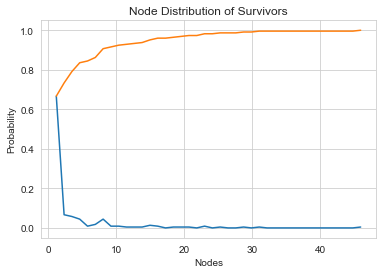

In [97]:
counts, bin_edges = np.histogram(survived_yes['Axil_Nodes'], bins=40,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.title("Node Distribution of Survivors")
plt.ylabel("Probability")
plt.xlabel("Nodes")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:],cdf)

Observations:
1. 80% of survivors have fewer than 4 nodes.
2. 90% of survivors have fewer than 10 nodes.


[0.33333333 0.0617284  0.08641975 0.08641975 0.03703704 0.02469136
 0.07407407 0.01234568 0.03703704 0.01234568 0.0617284  0.02469136
 0.         0.01234568 0.02469136 0.01234568 0.02469136 0.03703704
 0.01234568 0.         0.         0.         0.         0.
 0.         0.         0.01234568 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01234568]
[ 0.   1.3  2.6  3.9  5.2  6.5  7.8  9.1 10.4 11.7 13.  14.3 15.6 16.9
 18.2 19.5 20.8 22.1 23.4 24.7 26.  27.3 28.6 29.9 31.2 32.5 33.8 35.1
 36.4 37.7 39.  40.3 41.6 42.9 44.2 45.5 46.8 48.1 49.4 50.7 52. ]


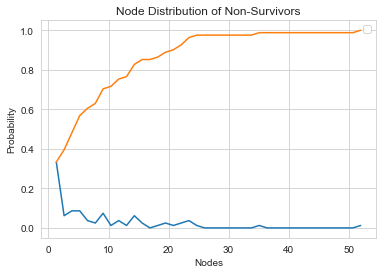

In [104]:
counts, bin_edges = np.histogram(survived_no['Axil_Nodes'], bins=40,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.title("Node Distribution of Non-Survivors")
plt.ylabel("Probability")
plt.xlabel("Nodes")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:],cdf)

Observations:
1. Less than 50% of non-survivors have fewer than 4 nodes.
2. 70% of non-survivors have fewer than 10 nodes.
3. Using 4 nodes as the cut-off versus 10 nodes at the cut-off for our prediction makes sense, as there is a bigger proportional difference between non-survivors and survivors at 4 nodes (50% vs. 80%) than at 10 nodes (70% vs. 90%). In other words, patients having 4 nodes or fewer suggests a significantly higher chance of survival.

My conclusions are as follows:

1. The best predictor is the number of nodes. Patients with fewer than 3 or fwer nodes are significantly more likely to survive breast cancer surgery (~60% higher chance).
2. While age is not a reliable indicator, patients at the extreme ends have different risk profiles. Patients under 40 are more likely to survive on average and those over 70 are less likely to survive on average.
3. Operating year only matters from 1967 to 1975, when it appears that there was an initial decrease in mortality followed by an increase in mortality. This may have to do with the dataset (random variations) or specifics related to the hospital. This could use more investigation, though it'd likely require additional data or information about hospital changes those years.